In [1117]:
import gensim
from gensim import corpora
from pprint import pprint
import pandas as pd

In [1118]:
df = pd.read_excel("/Users/apple/Desktop/Mecklenburg_Lawn_Garden_(Hort2022-02-15_13_54_51.xlsx")

In [1119]:
df.dropna(axis='columns')

,Submission Date
0,2022/02/15 10:10:06
1,2022/02/11 02:10:18
2,2022/02/08 14:53:19
3,2022/02/03 11:31:30
4,2022/01/28 13:48:52
...,...
568,2019/05/03 11:49:36
569,2019/05/03 11:48:46
570,2019/05/01 14:53:38
571,2019/05/01 12:59:01


In [1120]:
df

,Submission Date,Last Update Date,Postal / Zip Code,My growing question is about,Location of Plant,Are you a Homeowner or Green Industry Business,Got a Growing QUESTION? Ask Us Here!,Upload images of your problem,Upload images of your problem.1,No Label,No Label.1,How would you prefer us to contact you?,Tags
0,2022/02/15 10:10:06,NaN,28205,Flowers,Partial Sun (4-6 hours),Homeowner,Are you able to recommend a lawn alternative p...,NaN,NaN,NaN,NaN,NaN,NaN
1,2022/02/11 02:10:18,NaN,28227,Diseases or Insects,Partial Sun (4-6 hours),Homeowner,I laid 3 inches on small pine bark nuggets ove...,NaN,https://www.jotform.com/uploads/sjcapobi/91204...,NaN,NaN,NaN,NaN
2,2022/02/08 14:53:19,NaN,28205,Fruit or Vegetables,NaN,Homeowner,My irrigation system for vegetables. I have a ...,NaN,NaN,NaN,NaN,NaN,NaN
3,2022/02/03 11:31:30,NaN,28226,Diseases or Insects,Partial Sun (4-6 hours),Homeowner,I have heard rumors that there is a nasty mulc...,NaN,NaN,NaN,NaN,NaN,NaN
4,2022/01/28 13:48:52,NaN,28209,Fruit or Vegetables,Full Sun (8 Hours +),Homeowner,I'm setting up my garden bed for sweet onions ...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,2019/05/03 11:49:36,2022/01/07 15:43:50,28078-9741,NaN,NaN,Homeowner,NaN,NaN,NaN,NaN,NaN,Email,NaN
569,2019/05/03 11:48:46,2022/01/07 15:43:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
570,2019/05/01 14:53:38,2022/01/07 15:43:50,28209,NaN,NaN,Homeowner,This is a TEST message. No need to respond.,NaN,https://www.jotform.com/uploads/sjcapobi/91204...,https://www.jotform.com/uploads/sjcapobi/91204...,NaN,Email,NaN
571,2019/05/01 12:59:01,2022/01/07 15:43:50,1908 Sharon Lane 28211,NaN,NaN,NaN,Not ever enough time to garden!,NaN,NaN,NaN,NaN,NaN,NaN


In [1121]:
df.rename(columns={'Submission Date':'Question_Date', 'Last Update Date':'Updated_Date','Postal / Zip Code':'Zip_Code', 
                   'My growing question is about':'Subject','Location of Plant': 'Sun_Exposure', 'Are you a Homeowner or Green Industry Business':'Type'
                   ,'Got a Growing QUESTION? Ask Us Here!':'Question','How would you prefer us to contact you?':'Prefered_Contact'
                  }, inplace=True)

In [1122]:
df.drop(['Upload images of your problem', 'Upload images of your problem.1','No Label','No Label.1','Tags','Prefered_Contact'], axis = 1,inplace=True)

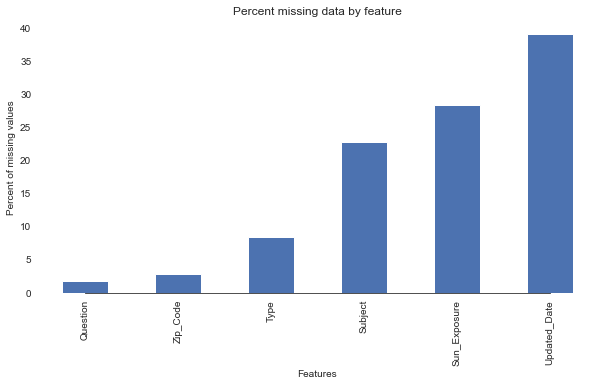

In [1123]:
#Visulaizing Missing data
# Visualize missing values

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
f, ax = plt.subplots(figsize=(10, 5))
sns.set_color_codes(palette='deep')
missing = round(df.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

In [1124]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)

,Total,Percent
Updated_Date,224,0.390925
Sun_Exposure,163,0.284468
Subject,131,0.228621
Type,48,0.083770
Zip_Code,16,0.027923
Question,10,0.017452
Question_Date,0,0.000000


In [1125]:
df['Sun_Exposure'].value_counts()

Full Sun (8 Hours +)         219
Partial Sun (4-6 hours)      155
Shade (less than 4 hours)     36
Name: Sun_Exposure, dtype: int64

In [1126]:
df.Zip_Code.isna().sum()
df['Zip_Code'] = df['Zip_Code'].str.extract(r'(\d{5}\-?\d{0,4})')
df['Zip_Code']=df['Zip_Code'].str[:5]
df['Zip_Code']


0      28205
1      28227
2      28205
3      28226
4      28209
       ...  
568    28078
569      NaN
570    28209
571    28211
572      NaN
Name: Zip_Code, Length: 573, dtype: object

In [1127]:
df['Zip_Code'].dropna()

0      28205
1      28227
2      28205
3      28226
4      28209
       ...  
566    28210
567    28078
568    28078
570    28209
571    28211
Name: Zip_Code, Length: 553, dtype: object

In [1128]:
df['Zip_Code'] = df['Zip_Code'].fillna(df['Zip_Code'].mode()[0])

In [1129]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)

,Total,Percent
Updated_Date,224,0.390925
Sun_Exposure,163,0.284468
Subject,131,0.228621
Type,48,0.083770
Question,10,0.017452
Question_Date,0,0.000000
Zip_Code,0,0.000000


In [1130]:
df.Question=df.Question.astype(str)

In [1131]:
from datetime import datetime
import numpy as np
from math import sin, cos, pi
df['Question_Date'] = pd.to_datetime(df['Question_Date'])

df ['Month']=df['Question_Date'].dt.month
import numpy as np

df['mnth_sin'] = np.sin((df.Month-1)*(2.*np.pi/12))
df['mnth_cos'] = np.cos((df.Month-1)*(2.*np.pi/12))

In [1132]:
df.columns

Index(['Question_Date', 'Updated_Date', 'Zip_Code', 'Subject', 'Sun_Exposure',
       'Type', 'Question', 'Month', 'mnth_sin', 'mnth_cos'],
      dtype='object')

In [1133]:
from sklearn.preprocessing import LabelEncoder

In [1134]:
df['Zip_Code'].astype(str).str.isnumeric()

0      True
1      True
2      True
3      True
4      True
       ... 
568    True
569    True
570    True
571    True
572    True
Name: Zip_Code, Length: 573, dtype: bool

new_df = df.Subject.value_counts()

new_df

In [1135]:
cleanup_nums = {"Subject": {"Trees or Shrubs": 1, "Flowers": 2, "Fruit or Vegetables": 3, "Diseases or Insects": 4}}

In [1136]:
df = df.replace(cleanup_nums)

In [1137]:
df.Subject.value_counts()

1                                                                     142
2                                                                      84
3                                                                      68
4                                                                      60
Trees or Shrubs\nDiseases or Insects                                   24
Flowers\nTrees or Shrubs                                               22
Fruit or Vegetables\nTrees or Shrubs                                    9
Flowers\nTrees or Shrubs\nDiseases or Insects                           8
Flowers\nDiseases or Insects                                            8
Flowers\nFruit or Vegetables                                            6
Fruit or Vegetables\nDiseases or Insects                                4
Flowers\nFruit or Vegetables\nTrees or Shrubs\nDiseases or Insects      3
Flowers\nFruit or Vegetables\nTrees or Shrubs                           3
Fruit or Vegetables\nTrees or Shrubs\n

In [1138]:
df

,Question_Date,Updated_Date,Zip_Code,Subject,Sun_Exposure,Type,Question,Month,mnth_sin,mnth_cos
0,2022-02-15 10:10:06,NaN,28205,2,Partial Sun (4-6 hours),Homeowner,Are you able to recommend a lawn alternative p...,2,0.500000,0.866025
1,2022-02-11 02:10:18,NaN,28227,4,Partial Sun (4-6 hours),Homeowner,I laid 3 inches on small pine bark nuggets ove...,2,0.500000,0.866025
2,2022-02-08 14:53:19,NaN,28205,3,NaN,Homeowner,My irrigation system for vegetables. I have a ...,2,0.500000,0.866025
3,2022-02-03 11:31:30,NaN,28226,4,Partial Sun (4-6 hours),Homeowner,I have heard rumors that there is a nasty mulc...,2,0.500000,0.866025
4,2022-01-28 13:48:52,NaN,28209,3,Full Sun (8 Hours +),Homeowner,I'm setting up my garden bed for sweet onions ...,1,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
568,2019-05-03 11:49:36,2022/01/07 15:43:50,28078,NaN,NaN,Homeowner,nan,5,0.866025,-0.500000
569,2019-05-03 11:48:46,2022/01/07 15:43:50,28209,NaN,NaN,NaN,nan,5,0.866025,-0.500000
570,2019-05-01 14:53:38,2022/01/07 15:43:50,28209,NaN,NaN,Homeowner,This is a TEST message. No need to respond.,5,0.866025,-0.500000
571,2019-05-01 12:59:01,2022/01/07 15:43:50,28211,NaN,NaN,NaN,Not ever enough time to garden!,5,0.866025,-0.500000


df.dropna(inplace=True)

In [1139]:

df['Subject'][~df['Subject'].isin([1,2,3,4])]=5

/var/folders/w1/dw5vm6p955bgmws4x53sjlym0000gn/T/ipykernel_3644/1690232613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subject'][~df['Subject'].isin([1,2,3,4])]=5


In [1140]:
df

,Question_Date,Updated_Date,Zip_Code,Subject,Sun_Exposure,Type,Question,Month,mnth_sin,mnth_cos
0,2022-02-15 10:10:06,NaN,28205,2,Partial Sun (4-6 hours),Homeowner,Are you able to recommend a lawn alternative p...,2,0.500000,0.866025
1,2022-02-11 02:10:18,NaN,28227,4,Partial Sun (4-6 hours),Homeowner,I laid 3 inches on small pine bark nuggets ove...,2,0.500000,0.866025
2,2022-02-08 14:53:19,NaN,28205,3,NaN,Homeowner,My irrigation system for vegetables. I have a ...,2,0.500000,0.866025
3,2022-02-03 11:31:30,NaN,28226,4,Partial Sun (4-6 hours),Homeowner,I have heard rumors that there is a nasty mulc...,2,0.500000,0.866025
4,2022-01-28 13:48:52,NaN,28209,3,Full Sun (8 Hours +),Homeowner,I'm setting up my garden bed for sweet onions ...,1,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
568,2019-05-03 11:49:36,2022/01/07 15:43:50,28078,5,NaN,Homeowner,nan,5,0.866025,-0.500000
569,2019-05-03 11:48:46,2022/01/07 15:43:50,28209,5,NaN,NaN,nan,5,0.866025,-0.500000
570,2019-05-01 14:53:38,2022/01/07 15:43:50,28209,5,NaN,Homeowner,This is a TEST message. No need to respond.,5,0.866025,-0.500000
571,2019-05-01 12:59:01,2022/01/07 15:43:50,28211,5,NaN,NaN,Not ever enough time to garden!,5,0.866025,-0.500000


In [1141]:
df.Subject.value_counts()

5    219
1    142
2     84
3     68
4     60
Name: Subject, dtype: int64

In [1142]:
Questions = list(df['Question'])

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/wordcloud/wordcloud.py:492: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/wordcloud/wordcloud.py:492: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation

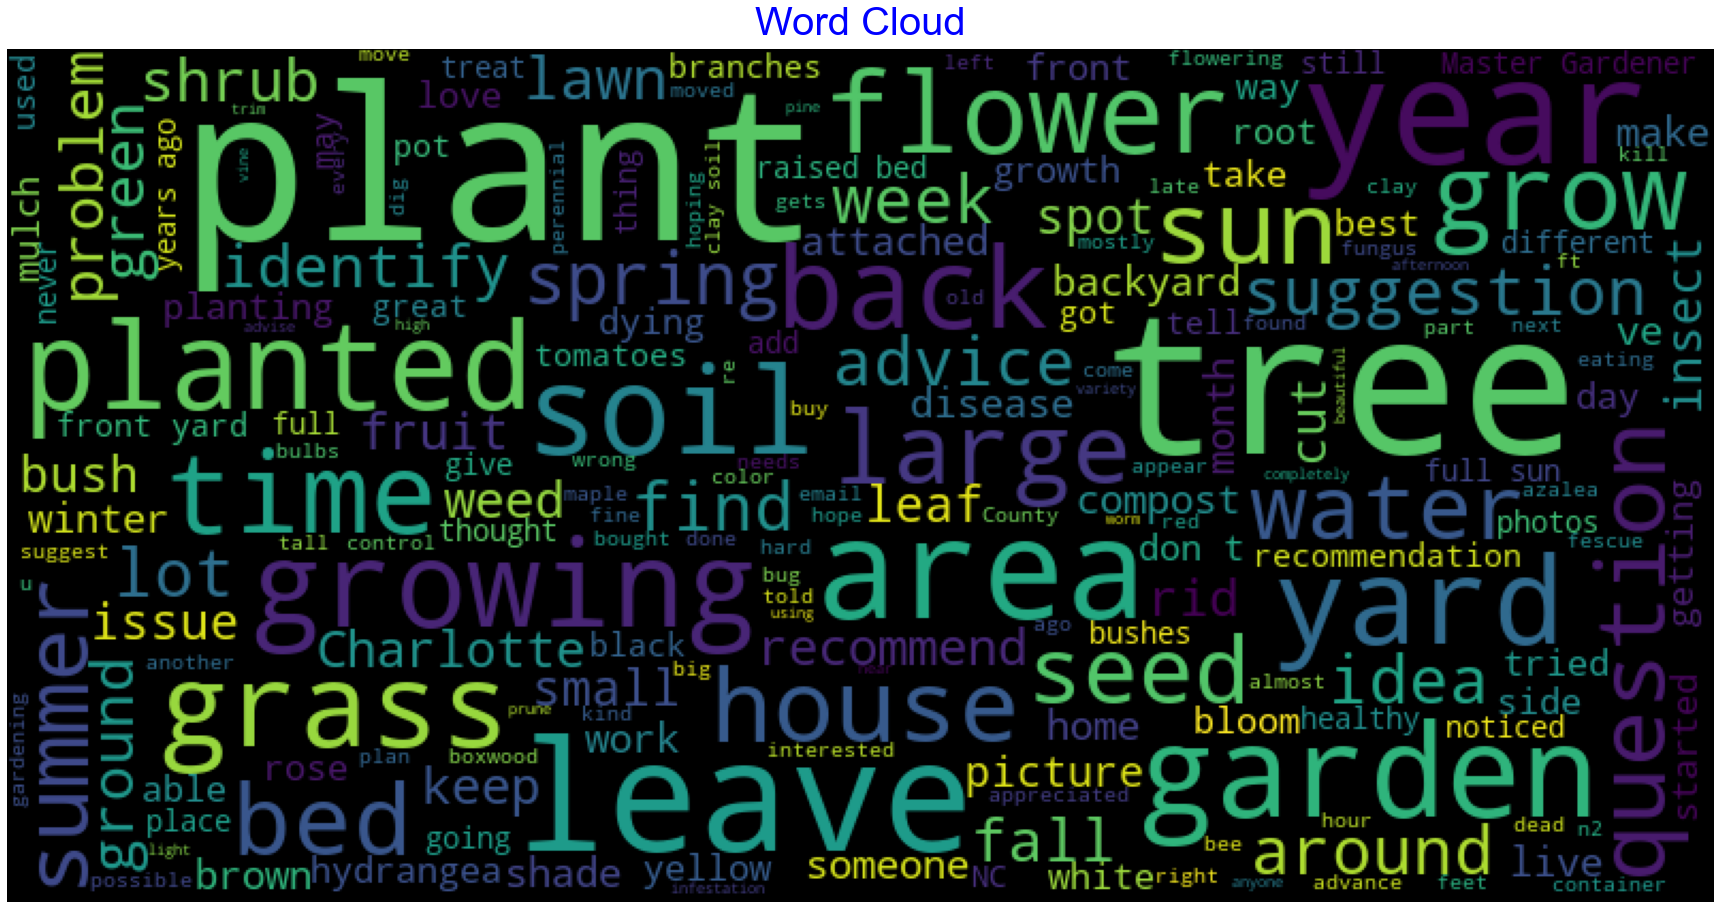

In [1143]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

df.head()
#Checking for NaN values
df.isna().sum()
#Removing NaN Values
#df.dropna(inplace = True)
#Creating the text variable
text=' '
for i in range(len(Questions)):
    text=  " ".join(str(Questions).split())


from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'kkkk', 'ok', 'thank','Greetings','I','nan','Hi','Hello' ,'nan', 'Hey','Q',"Rec'vd",'Yes','many','nope','d','s','m','two','First','now','new','think'
                     'good','Purchased','Recently','look','well','thanks','Please','Several','Today','Looking','Need','Regarding','Info','Last','Wondering','Help','Good','Long',
                     'will','want','looks','know','think','type','seems','sure','anything','couple',"don t",'little','try','something','trying','photo','nThank','nThanks','see','put','nI','etc','much','might','use','really','n'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'blue', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(text, title="Word Cloud")



In [1144]:
import category_encoders as ce
tenc=ce.TargetEncoder() 
df_city=tenc.fit_transform(df['Zip_Code'],df['Subject'])

df_new = df_city.join(df.drop('Zip_Code',axis = 1))


In [1145]:
df_Pred = df_new[['Subject','Zip_Code','Sun_Exposure','mnth_sin','mnth_cos',,'Type']]

SyntaxError: invalid syntax (2879404459.py, line 1)

In [ ]:
df_Pred

In [ ]:
df_Pred = pd.get_dummies(df_Pred, columns=['Sun_Exposure','Type'])

In [ ]:
df_Pred

In [ ]:
df_Pred

In [ ]:
y.value_counts()

In [ ]:
y=y.astype('int')

In [1146]:
from sklearn.linear_model import LogisticRegression
logR_ovr = LogisticRegression(multi_class='ovr',solver='lbfgs',penalty='none', C=1.0)
logR_ovr.fit(X,y)
print("Score When multi_class = 'ovr':",logR_ovr.score(X,y))

Score When multi_class = 'ovr': 0.47294938917975565


In [1147]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
pred_ovr = logR_ovr.predict(X)
print("multi_class='ovr'\n")
print(metrics.confusion_matrix(y,pred_ovr,labels=[1,2,3,4]))
print(metrics.classification_report(y,pred_ovr,labels=[1,2,3,4]))

multi_class='ovr'

[[96  0  2  0]
 [49  0  3  0]
 [32  0  4  0]
 [28  0  0  0]]
              precision    recall  f1-score   support

           1       0.39      0.68      0.49       142
           2       0.00      0.00      0.00        84
           3       0.31      0.06      0.10        68
           4       0.00      0.00      0.00        60

   micro avg       0.38      0.28      0.32       354
   macro avg       0.17      0.18      0.15       354
weighted avg       0.21      0.28      0.22       354



/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1148]:
logR_mul = LogisticRegression(multi_class='multinomial')
logR_mul.fit(X,y)
print("Score When multi_class = 'mul':",logR_mul.score(X,y))

Score When multi_class = 'mul': 0.4712041884816754


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1149]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
pred_mul = logR_ovr.predict(X)
print("multi_class='multinomial'\n")
print(metrics.confusion_matrix(y,pred_mul,labels=[1,2,3,4]))
print(metrics.classification_report(y,pred_mul,labels=[1,2,3,4]))

multi_class='multinomial'

[[96  0  2  0]
 [49  0  3  0]
 [32  0  4  0]
 [28  0  0  0]]
              precision    recall  f1-score   support

           1       0.39      0.68      0.49       142
           2       0.00      0.00      0.00        84
           3       0.31      0.06      0.10        68
           4       0.00      0.00      0.00        60

   micro avg       0.38      0.28      0.32       354
   macro avg       0.17      0.18      0.15       354
weighted avg       0.21      0.28      0.22       354



/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1150]:
df.to_csv('/Users/apple/Desktop/Cleaned_Lawn_Garden.csv', encoding='utf-8')

In [1151]:
df.isna().sum()

Question_Date      0
Updated_Date     224
Zip_Code           0
Subject            0
Sun_Exposure     163
Type              48
Question           0
Month              0
mnth_sin           0
mnth_cos           0
dtype: int64

In [1152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Question_Date  573 non-null    datetime64[ns]
 1   Updated_Date   349 non-null    object        
 2   Zip_Code       573 non-null    object        
 3   Subject        573 non-null    object        
 4   Sun_Exposure   410 non-null    object        
 5   Type           525 non-null    object        
 6   Question       573 non-null    object        
 7   Month          573 non-null    int64         
 8   mnth_sin       573 non-null    float64       
 9   mnth_cos       573 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 44.9+ KB


In [1153]:
stopwords = set(STOPWORDS)
more_stopwords = {'one','i','3','6','34','kkkk', 'ok', 'thank','Greetings','I','nan','Hi','Hello' ,'nan', 'Hey','Q',"Rec'vd",'Yes','many','nope','d','s','m','two','First','now','new','think'
                     'good','Purchased','Recently','look','well','thanks','Please','Several','Today','Looking','Need','Regarding','Info','Last','Wondering','Help','Good','Long','?','.',
                     'will','my','want','looks','know','think','type','seems','sure','anything','couple',"don t",'little','try','something','trying','photo','nThank','nThanks','see','put','nI','etc','much','might','use','really','n'}
stopwords = list(stopwords.union(more_stopwords))

In [1154]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import gensim
from gensim import corpora
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

# set of stopwords
stopwords = set(STOPWORDS)
more_stopwords = {'one','i','3','6','34','kkkk', 'ok','me',"i've","can't",'it','It',"i’m",'thank','Greetings','I','nan','Hi','Hello' ,'nan', 'Hey','Q',"Rec'vd",'Yes','many','nope','d','s','m','two','First','now','new','think'
                     'good','Purchased','Recently','look','well','thanks','Please','Several','Today','Looking','Need','Regarding','Info','Last','Wondering','Help','Good','Long','?','.',
                     'will','my','want','looks','know','think','type','seems','sure','anything','couple',"don t",'little','try','something','trying','photo','nThank','nThanks','see','put','nI','etc','much','might','use','really','n'}
stopwords = stopwords.union(more_stopwords)
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stopwords])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in Questions]

dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=50)


[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [1155]:
print(ldamodel.print_topics(num_topics=4, num_words=3))

[(4, '0.009*"tree" + 0.008*"leaf" + 0.007*"plant"'), (0, '0.033*"tree" + 0.016*"plant" + 0.014*"year"'), (2, '0.019*"soil" + 0.009*"clay" + 0.008*"garden"'), (1, '0.015*"leaf" + 0.013*"plant" + 0.008*"tree"')]


In [1156]:
pip install pyldavis

Note: you may need to restart the kernel to use updated packages.


In [1157]:
import pyLDAvis
from gensim.models import Word2Vec
import pyLDAvis.gensim_models
vis = pyLDAvis.gensim_models.prepare(topic_model=ldamodel, 
                              corpus=doc_term_matrix, 
                              dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
